In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000115 (2).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000115 (5).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000112.png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000118 (5).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000117 (4).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000114 (6).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000117 (6).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000114 (4).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000118 (4).png
/kaggle/input/chest-cts

In [2]:
import torch
from torch import nn
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import matplotlib.pyplot as plt

## FDCT 데이터 불러옴

In [4]:
import torch
import os
from PIL import Image

In [5]:
# 이미지를 텐서로 변환
data_transform = transforms.Compose([
    transforms.Resize(size=(512, 512)),
     transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
 

]) 

In [6]:
data_dirs = {
    "train": "/kaggle/input/chest-ctscan-images/Data/train",
    "test": "/kaggle/input/chest-ctscan-images/Data/test",
    "valid": "/kaggle/input/chest-ctscan-images/Data/valid",
}

In [7]:
train_data = datasets.ImageFolder(root=data_dirs["train"], transform=data_transform)
print(f"Number of samples in train_data: {len(train_data)}")
print(f"Classes: {train_data.classes}")

Number of samples in train_data: 613
Classes: ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


In [8]:
# 데이터 디렉토리에서 첫 번째 이미지 파일 경로 확인
sample_class_dir = os.path.join(data_dirs["train"], train_data.classes[0])
sample_image_path = os.path.join(sample_class_dir, os.listdir(sample_class_dir)[0])

# 원본 이미지 로드
sample_image = Image.open(sample_image_path)
print(f"Original Image Size: {sample_image.size}, Mode: {sample_image.mode}")

# 변환 확인
transformed_image = data_transform(sample_image)
print(f"Transformed Image Tensor: {transformed_image}")
print(f"Tensor Max: {transformed_image.max()}, Min: {transformed_image.min()}, Mean: {transformed_image.mean()}")

Original Image Size: (341, 247), Mode: RGBA
Transformed Image Tensor: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
       

In [9]:
train_data[np.random.randint(0 , len(data_dirs["train"]))]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

왜 다 0으로 나오지.. 데이터에 문제가 있나 확인 ~ 

In [10]:
train_data = datasets.ImageFolder(root=data_dirs["train"], transform=data_transform)
print(f"Number of samples in train_data: {len(train_data)}")
print(f"Classes: {train_data.classes}")

Number of samples in train_data: 613
Classes: ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


Sample Tensor Max: 1.0, Min: 0.0, Mean: 0.443967342376709


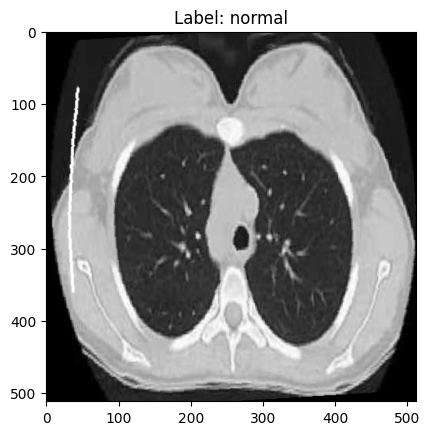

In [11]:
from matplotlib import pyplot as plt
import torchvision.transforms.functional as F

# 랜덤 샘플 추출
sample_img, sample_label = train_data[np.random.randint(0, len(train_data))]

# 원본 텐서 확인
print(f"Sample Tensor Max: {sample_img.max()}, Min: {sample_img.min()}, Mean: {sample_img.mean()}")

# 이미지 시각화
plt.imshow(F.to_pil_image(sample_img))  # Tensor를 PIL 이미지로 변환 후 시각화
plt.title(f"Label: {train_data.classes[sample_label]}")
plt.show()

Tensor Values - Max: 0.9960784316062927, Min: 0.0, Mean: 0.25226131081581116


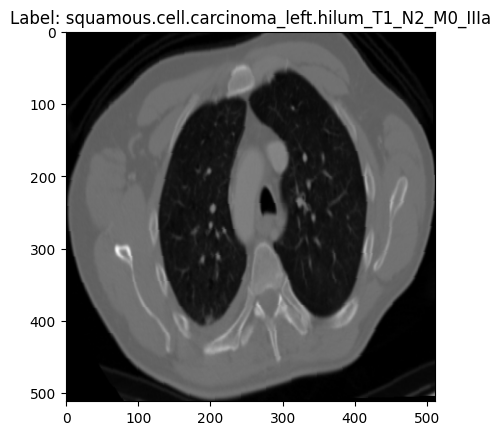

In [12]:
# 샘플 이미지 텐서 확인
sample_img, sample_label = train_data[np.random.randint(0, len(train_data))]

# 텐서 값 출력
print(f"Tensor Values - Max: {sample_img.max()}, Min: {sample_img.min()}, Mean: {sample_img.mean()}")

# 이미지 시각화
import torchvision.transforms.functional as F
from matplotlib import pyplot as plt

plt.imshow(F.to_pil_image(sample_img))  # 텐서를 PIL 이미지로 변환해 확인
plt.title(f"Label: {train_data.classes[sample_label]}")
plt.show()


In [13]:
len(train_data)  , len(data_dirs["test"])

(613, 43)

In [14]:
class_names = train_data.classes
class_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [15]:
class_dict = train_data.class_to_idx
class_dict

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [16]:
# LDCT 데이터를 저장할 경로
ldct_save_dir = "/kaggle/working/ldct_data"
os.makedirs(ldct_save_dir, exist_ok=True)

In [17]:
dose_reduction_factor = 0.25

In [18]:
# FDCT -> LDCT 변환 및 저장
for split, path in data_dirs.items():  # train, test, valid 각각 처리
    dataset = datasets.ImageFolder(root=path, transform=data_transform)
    
    split_save_dir = os.path.join(ldct_save_dir, split)
    os.makedirs(split_save_dir, exist_ok=True)

    for i, (image_tensor, label) in enumerate(dataset):
        # FDCT 데이터를 NumPy 배열로 변환 (12-bit 데이터 가정)
        fdct_image = (image_tensor.numpy() * 4095).astype(np.float32)  # 12-bit 값으로 변환
        ldct_image = np.random.poisson(fdct_image * dose_reduction_factor).astype(np.uint16)  # 푸아송 노이즈 추가

        # 배열의 순서 변경 (C x H x W -> H x W x C)
        ldct_image = np.transpose(ldct_image, (1, 2, 0))

        # PIL 이미지를 생성
        ldct_image_pil = Image.fromarray(ldct_image, mode="I;16")  # 16-bit 이미지를 저장

        # 클래스별 디렉토리 생성 및 저장
        class_name = dataset.classes[label]
        class_dir = os.path.join(split_save_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)
        ldct_image_pil.save(os.path.join(class_dir, f"image_{i}.png"))

    print(f"{split} 데이터 변환 및 저장 완료: {split_save_dir}")

train 데이터 변환 및 저장 완료: /kaggle/working/ldct_data/train
test 데이터 변환 및 저장 완료: /kaggle/working/ldct_data/test
valid 데이터 변환 및 저장 완료: /kaggle/working/ldct_data/valid


In [ ]:
for split in ["train", "test", "valid"]:
    split_save_dir = os.path.join(ldct_save_dir, split)
    if os.path.exists(split_save_dir):
        print(f"\n{split} directory found: {split_save_dir}")
        for class_name in os.listdir(split_save_dir):
            class_path = os.path.join(split_save_dir, class_name)
            files = os.listdir(class_path)
            print(f"Class: {class_name}, Number of files: {len(files)}, Example file: {files[0]}")
    else:
        print(f"{split} directory is not found")


train directory found: /kaggle/working/ldct_data/train
Class: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, Number of files: 155, Example file: image_497.png
Class: normal, Number of files: 148, Example file: image_429.png
Class: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, Number of files: 195, Example file: image_17.png
Class: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, Number of files: 115, Example file: image_274.png

test directory found: /kaggle/working/ldct_data/test
Class: large.cell.carcinoma, Number of files: 51, Example file: image_152.png
Class: adenocarcinoma, Number of files: 120, Example file: image_17.png
Class: normal, Number of files: 54, Example file: image_207.png
Class: squamous.cell.carcinoma, Number of files: 90, Example file: image_274.png

valid directory found: /kaggle/working/ldct_data/valid
Class: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, Number of files: 15, Example file: image_68.png
Class: normal, Number of files: 13, Example file: image_49

## 변환된 이미지 시각화

In [20]:
ldct_data_dirs = {
    "train": "/kaggle/working/ldct_data/train",
    "test": "/kaggle/working/ldct_data/test",
    "valid": "/kaggle/working/ldct_data/valid"
}

In [21]:
data_transform = transforms.Compose([
    transforms.Resize((512, 512)),  
    transforms.ToTensor()         
])

In [22]:
ldct_train_data = datasets.ImageFolder(root=ldct_data_dirs["train"], transform=data_transform)
ldct_test_data = datasets.ImageFolder(root=ldct_data_dirs["test"], transform=data_transform)
ldct_valid_data = datasets.ImageFolder(root=ldct_data_dirs["valid"], transform=data_transform)

print(f"LDCT Train Data: {len(ldct_train_data)} images")
print(f"LDCT Test Data: {len(ldct_test_data)} images")
print(f"LDCT Valid Data: {len(ldct_valid_data)} images")

LDCT Train Data: 613 images
LDCT Test Data: 315 images
LDCT Valid Data: 72 images


In [23]:
ldct_image, label = ldct_train_data[0]
class_name = ldct_train_data.classes[label]

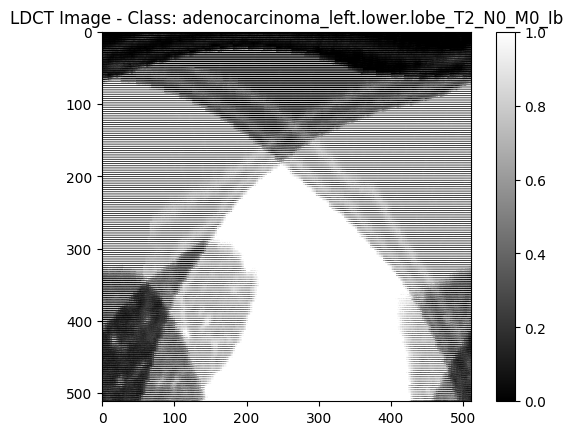

In [24]:
plt.imshow(ldct_image.permute(1, 2, 0), cmap="gray")
plt.title(f"LDCT Image - Class: {class_name}")
plt.colorbar()
plt.show()

## FDCT, LDCT 데이터 다운로드 

In [25]:
import shutil

In [26]:
fdct_zip_path = "/kaggle/working/fdct_data.zip"
ldct_zip_path = "/kaggle/working/ldct_data.zip"

In [27]:
shutil.make_archive(fdct_zip_path.replace(".zip", ""), "zip", "/kaggle/input/chest-ctscan-images/Data")
shutil.make_archive(ldct_zip_path.replace(".zip", ""), "zip", "/kaggle/working/ldct_data")

'/kaggle/working/ldct_data.zip'

In [28]:
train_dir = "/kaggle/working/ldct_data/train"

# 디렉토리 내 파일 확인
for root, dirs, files in os.walk(train_dir):
    for file in files:
        print(f"File: {os.path.join(root, file)}")
        break  # 하나만 확인 (필요하면 제거)

File: /kaggle/working/ldct_data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/image_497.png
File: /kaggle/working/ldct_data/train/normal/image_429.png
File: /kaggle/working/ldct_data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/image_17.png
File: /kaggle/working/ldct_data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/image_274.png


LDCT Min: 0, Max: 255, Mean: 128.72163772583008


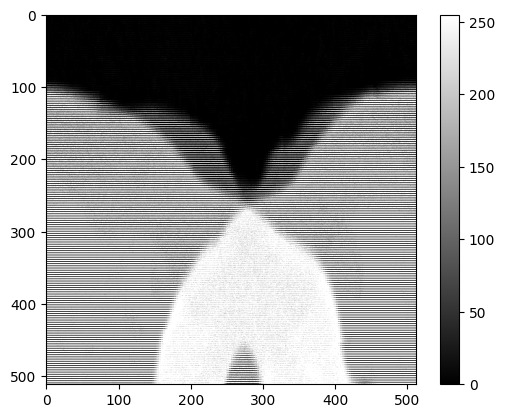

In [29]:
# LDCT 이미지 로드
ldct_image = Image.open("/kaggle/working/ldct_data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/image_230.png").convert("L")  # 흑백 변환

# 픽셀 값 확인
ldct_array = np.array(ldct_image)
print(f"LDCT Min: {ldct_array.min()}, Max: {ldct_array.max()}, Mean: {ldct_array.mean()}")

# 시각화
plt.imshow(ldct_array, cmap="gray")
plt.colorbar()
plt.show()

In [30]:
file_path = "/kaggle/working/ldct_data.zip"  # 다운로드된 zip 파일 경로
print(f"File Size: {os.path.getsize(file_path) / (1024 * 1024):.2f} MB")

File Size: 224.31 MB


In [31]:
kaggle_dataset = "sartajbhuvaji/large-covid19-ct-slice-dataset"
download_path = "./ldct_data"
os.makedirs(download_path, exist_ok=True)

# 데이터 다운로드
os.system(f"kaggle datasets download -d {kaggle_dataset} -p {download_path} --unzip")
print("Download complete!")

403 - Forbidden - Permission 'datasets.get' was denied
Download complete!


### ldct 데이터는 문제가 좀 있다, 이 코드에서는 fdct 데이터만 쓰고 ldct 데이터는 다른 방법으로 만들자

In [32]:
mkdir -p ~/.kaggle